In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import seaborn data
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
#Section 1
#average tip amount
tip = tips['tip']
sum_tip = sum(tip)
len_tip = len(tip)
avg_tip = sum_tip / len_tip
print("Average tip:", avg_tip)

Average tip: 2.9982786885245902


In [7]:
#average bill amount
bill = tips['total_bill']
sum_bill = sum(bill)
len_bill = len(bill)
avg_bill = sum_bill / len_bill
print("Average bill:", avg_bill)

Average bill: 19.785942622950824


In [8]:
#average tip by gender
tips.groupby('sex').mean()['tip']

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [9]:
#average tip on a sunday by gender
tip_by_day = tips.groupby('day')
sun_tip = tip_by_day.get_group('Sun')

sun_tip.groupby('sex').mean()['tip']

sex
Male      3.220345
Female    3.367222
Name: tip, dtype: float64

In [10]:
#party size gives the maximum tip as a percent of total bill amount
if len(tips['size']) == 0:
    print(0)
else:
    tip_dict = {}
    for i in range(len(tips['size'])):
        curr_size = tips['size'][i]
        if curr_size not in tip_dict:
            tip_dict[curr_size] = [0, 0]   
        tip_params = tip_dict.get(curr_size)
        tip_params[0] = tip_params[0] + tips['tip'][i]
        tip_params[1] = tip_params[1] + tips['total_bill'][i]

    max_party_size = tips['size'][0]
    max_percentage = 0
    for key in tip_dict:
        curr_value = tip_dict.get(key)
        curr_percentage = curr_value[0] / curr_value[1]
        if curr_percentage > max_percentage:
            max_percentage = curr_percentage
            max_party_size = key
    print("The party size:", max_party_size)

The party size: 1


In [11]:
#Section 2
#scatter plot

Text(0, 0.5, 'Tip')

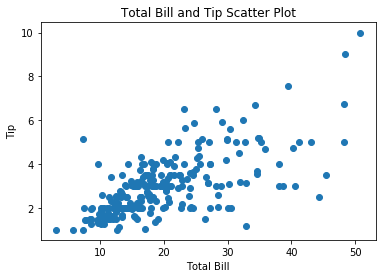

In [12]:
#generate plots using matplotlib
x = tips['total_bill']
y = tips['tip']
plt.scatter(x, y, marker = 'o')
plt.title('Total Bill and Tip Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

In [13]:
#generate plots using bokeh
from bokeh.plotting import figure, show
p = figure(plot_width = 500, plot_height = 500, 
           title = 'Total Bill and Tip Scatter Plot', 
           x_axis_label = 'Total Bill', y_axis_label = 'Tip')
p.circle(x, y)
show(p)

[Text(0, 0.5, 'Tip'),
 Text(0.5, 0, 'Total Bill'),
 Text(0.5, 1.0, 'Total Bill and Tip Scatter Plot')]

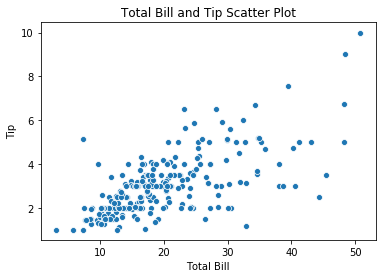

In [14]:
#generate plots using seaborn
picture = sns.scatterplot(x = "total_bill", y = "tip", data = tips)
picture.set(title = 'Total Bill and Tip Scatter Plot', 
            xlabel = 'Total Bill', ylabel = 'Tip')

{'whiskers': [<matplotlib.lines.Line2D at 0x254900fdc48>,
 'caps': [<matplotlib.lines.Line2D at 0x254900fdd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x254900fd248>],
 'medians': [<matplotlib.lines.Line2D at 0x25490105d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25490108508>],
 'means': []}

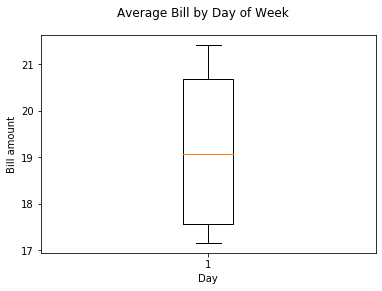

In [15]:
#Section 3
#using matplotlib to generate 
#box plot of average bill amount by day of week
a = tips.groupby('day').mean()['total_bill']

fig = plt.figure()
fig.suptitle('Average Bill by Day of Week')

plt.xlabel('Day')
plt.ylabel('Bill amount')
plt.boxplot(a)

{'whiskers': [<matplotlib.lines.Line2D at 0x25490166f88>,
 'caps': [<matplotlib.lines.Line2D at 0x2549016a448>,
 'boxes': [<matplotlib.lines.Line2D at 0x25490166708>],
 'medians': [<matplotlib.lines.Line2D at 0x2549016f588>],
 'fliers': [<matplotlib.lines.Line2D at 0x2549016fdc8>],
 'means': []}

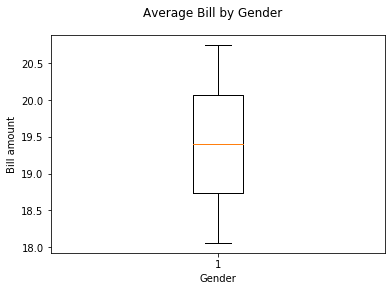

In [16]:
#box plot of average bill amount by gender
b = tips.groupby('sex').mean()['total_bill']

fig = plt.figure()
fig.suptitle('Average Bill by Gender')

plt.xlabel('Gender')
plt.ylabel('Bill amount')
plt.boxplot(b)

Text(0, 0.5, 'Bill amount')

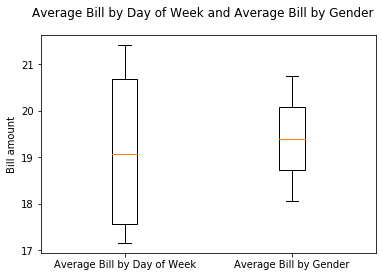

In [17]:
#show above two plot

a_and_b = [tips.groupby('day').mean()['total_bill'],tips.groupby('sex').mean()['total_bill']]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Average Bill by Day of Week and Average Bill by Gender')

plt.boxplot(a_and_b)
ax.set_xticklabels(['Average Bill by Day of Week','Average Bill by Gender'])
plt.ylabel('Bill amount')

In [13]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [170]:
#using bokeh to generate same plot
#box plot of average bill amount by day of week
from bokeh.plotting import figure, show, output_file
a = tips.groupby('day').mean()['total_bill']

a_q1 = a.quantile(q = 0.25)
a_q2 = a.quantile(q = 0.5)
a_q3 = a.quantile(q = 0.75)
a_IQR = a_q3 - a_q1
a_upper_limit = a_q3 + 1.5 * a_IQR
a_lower_limit = a_q1 - 1.5 * a_IQR

a_max = a.quantile(q = 1.0)
a_min = a.quantile(q = 0.0)

if a_max > a_upper_limit:
    a_max = a_upper_limit

if a_min < a_lower_limit:
    a_min = a_lower_limit

a_outliers = []
for i in range(len(a)):
    num = a[i]
    if num > a_upper_limit or num < a_lower_limit:
        a_outliers.append(num)

a_graph = figure()
a_graph.segment(None, a_max, None, a_q3, line_color = "black")
a_graph.segment(None, a_min, None, a_q1, line_color = "black")

a_graph.vbar(None, 1, a_q2, a_q3, fill_color = "white", line_color = "black")
a_graph.vbar(None, 1, a_q1, a_q2, fill_color = "white", line_color = "black")

a_graph.rect(None, a_min, 0.2, 0.01, line_color = "black")
a_graph.rect(None, a_max, 0.2, 0.01, line_color = "black")

a_graph.circle(None, a_outliers, size = 6, color = "grey", fill_alpha = 0.5)

a_graph.x_range.start = -3
a_graph.x_range.end = 3

a_graph.title.text = "Average Bill by Day of Week"
a_graph.title.align = "center"
a_graph.xaxis.ticker = [0]
a_graph.xaxis.major_label_overrides = {0: "Day"}
a_graph.yaxis.axis_label = "Bill amount"

show(a_graph)

In [171]:
#box plot of average bill amount by gender
b = tips.groupby('sex').mean()['total_bill']

b_q1 = b.quantile(q=0.25)
b_q2 = b.quantile(q=0.5)
b_q3 = b.quantile(q=0.75)
b_IQR = b_q3 - b_q1
b_upper_limit = b_q3 + 1.5 * b_IQR
b_lower_limit = b_q1 - 1.5 * b_IQR

b_max = b.quantile(q = 1.0)
b_min = b.quantile(q = 0.0)

if b_max > b_upper_limit:
    b_max = b_upper_limit

if b_min < b_lower_limit:
    b_min = b_lower_limit
    
b_outliers = []
for i in range(len(a)):
    num = a[i]
    if num > b_upper_limit or num < b_lower_limit:
        b_outliers.append(num)

b_graph = figure()
b_graph.segment(None, b_max, None, b_q3, line_color = "black")
b_graph.segment(None, b_min, None, b_q1, line_color = "black")

b_graph.vbar(None, 1, b_q2, b_q3, fill_color = "white", line_color = "black")
b_graph.vbar(None, 1, b_q1, b_q2, fill_color = "white", line_color = "black")

b_graph.rect(None, b_min, 0.2, 0.01, line_color = "black")
b_graph.rect(None, b_max, 0.2, 0.01, line_color = "black")

b_graph.circle(None, b_outliers, size = 6, color = "grey", fill_alpha = 0.5)

b_graph.x_range.start = -3
b_graph.x_range.end = 3

b_graph.title.text = "Average Bill by Gender"
b_graph.title.align = "center"
b_graph.xaxis.ticker = [0]
b_graph.xaxis.major_label_overrides = {0: "Gender"}
b_graph.yaxis.axis_label = "Bill amount"

show(b_graph)

In [172]:
#show above two plot

x_array = [-1, 1]

both_max = [a_max, b_max]
both_min = [a_min, b_min]

both_q3 = [a_q3, b_q3]
both_q2 = [a_q2, b_q2]
both_q1 = [a_q1, b_q1]

both_graph = figure()

both_graph.segment(x_array, both_max, x_array, both_q3, line_color = "black")
both_graph.segment(x_array, both_min, x_array, both_q1, line_color = "black")

both_graph.vbar(x_array, 1, both_q2, both_q3, fill_color = "white", line_color = "black")
both_graph.vbar(x_array, 1, both_q1, both_q2, fill_color = "white", line_color = "black")

both_graph.rect(x_array, both_min, 0.2, 0.01, line_color = "black")
both_graph.rect(x_array, both_max, 0.2, 0.01, line_color = "black")

both_graph.x_range.start = -3
both_graph.x_range.end = 3

both_graph.title.text = "Average Bill by Day of Week and Average Bill by Gender"
both_graph.title.align = "center"
both_graph.xaxis.ticker = [-1, 1]
both_graph.xaxis.major_label_overrides = {-1: "Average Bill by Day of Week", 1: "Average Bill by Gender"}
both_graph.yaxis.axis_label = "Bill amount"

show(both_graph)



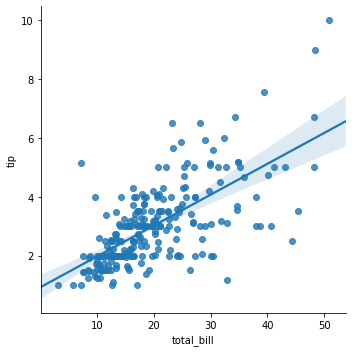

In [38]:
#section 4
#relationship between tips and total_bill

sns.lmplot(x = "total_bill", y = "tip", data = tips)

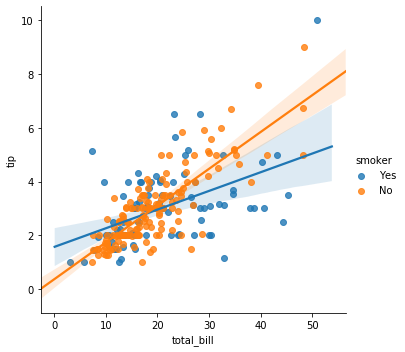

In [40]:
#Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips)

The graph above illustrates the non-smoker line has a steeper slope, so the non-smoker give a higher tip as a percentage of total_bill.

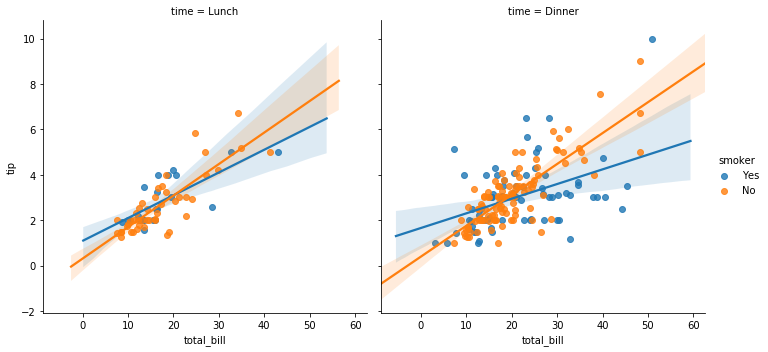

In [42]:
#Are tips larger during lunch or dinner (as a percentage of total_bill)
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips)

The non-smokers pay more than the smokers for the lunch and dinner. When comparing within the same group of people, the smokers pay more tips in lunch than they pay for dinner; while the non-smokers pay tips larger during the dinner than lunch.

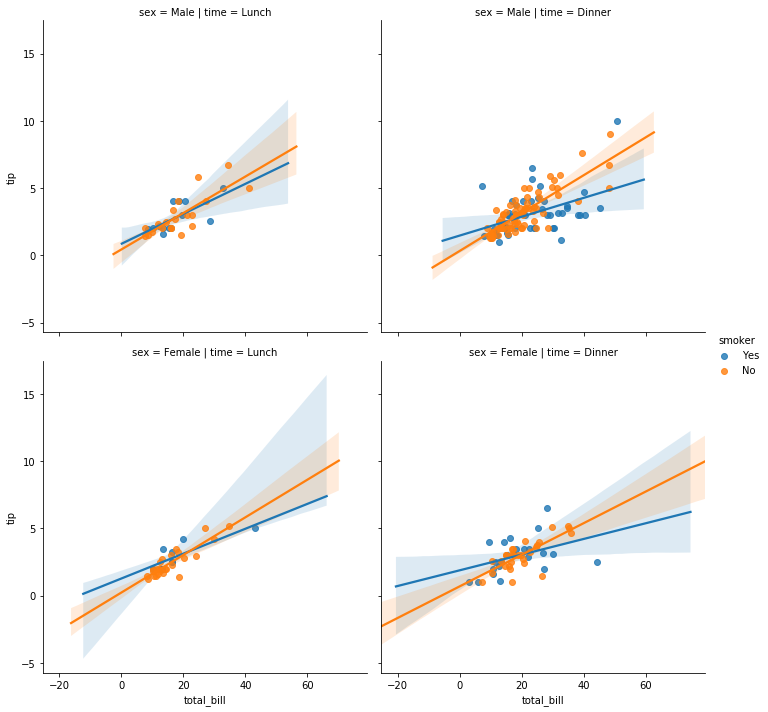

In [43]:
#Does the gender that tips the most(as a percentage of total_bill) change between lunch and dinner?
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = tips)

The non-smokers pay more than the smokers for the lunch and dinner both male and female. When comparing within the same group of people, the male smokers pay more tips in lunch than they pay for dinner; the female smokers pay more tips in lunch than they pay for dinner. While the male non-smokers pay more tips during the dinner than lunch; the female non-smokers also pay more tips during dinner than lunch. As a result, we can see gender is not a factor that influence the smoker or non-smoker to pay the tips.